# U.S. Medical Insurance Costs

The purpose of this project is to demonstrate python fundements while also investigating some common questions about health insurance costs. There are various libraries that could make the process much easier (pandas, numpy, ect), but it is imporant to be able to logically hard code various procedures. After the hardcoded methods have been implemented, I will us the pandas library to make some more interesting analysis easier. 

### Questions To be Answered:

* What is the average insurance cost in the United States? 
* What is the average age of the data set? 
* Are there more men or women in this data set?
* What reqions in the United States are the patients sampled from?

Assuming that the answers to the question above result in a data set that is representative of the United States, we can attempt to answer the following questions: 
* Are medical insurance costs hight for men or women?   
* Are medical insurance costs higher for those who have children?


To investigate the data set, I will create a patientInfomation() class with the following methods: 
- averageCosts()
- analyzeGender()
- analyzeAge()
- analyzeRegion()

We will then perform statisitcal analysis to answer the more indepth questions. 

### The Data Set: 
The data set consits of 1339 randomly sampled patients with varying age, sex, bmi, number of children, smoking status, and region in the United States. The outcome variable is the medical insurance cost.





In [1]:
#create lists to store the individual features in. 
age = []
sex = []
bmi = []
num_child = []
smoke = []
region = []
costs = [] #medical Insurance costs. 


In [2]:
#import the data set. 
import csv 
# helper function to load csv data
def load_list_data(lst, csv_file, column_name):
    # open csv file
    with open(csv_file) as csv_info:
        # read the data from the csv file
        csv_dict = csv.DictReader(csv_info)
        # loop through the data in each row of the csv 
        for row in csv_dict:
            # add the data from each row to a list
            lst.append(row[column_name])
        # return the list
        #return lst
        

Now that the data has been loaded, we need to store the data into their corresponding lists. 

In [3]:
load_list_data(age, 'insurance.csv', 'age')
load_list_data(sex, 'insurance.csv' , 'sex')
load_list_data(bmi, 'insurance.csv' , 'bmi')
load_list_data(num_child, 'insurance.csv' , 'children')
load_list_data(smoke, 'insurance.csv' , 'smoker')
load_list_data(region, 'insurance.csv' , 'region')
load_list_data(costs, 'insurance.csv' , 'charges')


In [10]:
class patientInformation(): 
    # init method that takes in each list parameter
    def __init__(self, age, sex, bmi, num_children, smoker, region, costs):
        self.age = age
        self.sex = sex
        self.bmi = bmi
        self.num_child = num_children
        self.smoker = smoker
        self.region = region 
        self.insurance_costs = costs 

    #method that calculates the average cost of insurance
    def averageCosts(self):
        total_charge = 0 
        for charges in self.insurance_costs: 
            total_charge += float(charges)
        average = int(total_charge/len(self.insurance_costs))
        return ("The average insurance cost in the United States is: "+ str(average) + " dollars.")

    #method that will calculate the average age of the patients in the dataset. 
    def analyzeAge(self):
        sum_age = 0
        for ages in self.age:
           sum_age += float(ages)
        average_age = int(sum_age/len(self.age))
        return ("The average patient age is " +str(average_age)+" years old.") 

    #method that will count the number of male and female patients in the data set. We will want to include other genders, but the current data set only has males and females. 
    def analyzeGender(self): 
        males = 0
        females = 0
        for patient in self.sex:
            #loop to count the number of male and femal patients
            if patient == "male":
                males += 1
            else:
                females += 1
        return ("There are " + str(males) + " males and " + str(females) + " females in this data set.")


    # method to find each unique region patients are from
    def regions(self):
        # initialize empty list
        unique_regions = []
        # iterate through each region in regions list
        for region in self.region:
            # if the region is not already in the unique regions list, add it to list. 
            if region not in unique_regions: 
                unique_regions.append(region)
        # return unique regions list
        return unique_regions


The first part of the analysis is to see what the average insurance cost across the united states: 

In [11]:
patient = patientInformation(age, sex, bmi, num_child, smoke, region, costs)
print(patient.averageCosts())


The average insurance cost in the United States is: 13270 dollars.


The averge insurance costs across the united states in $13,270.00. That seems quite high! I will do further analysis below to see what might inpact that average value. 

We want to make sure that the data set is representaitve of the population. Since the average life expectancy in the United States is around 80 years old. We want the average age of our data set to be around 40 years old. Since the distribution of men and females in the U.S population is about 50%, we want the split between the two sexs to be around 50/50. We also want to make sure that the patients are sampled from all over the U.S. 

In [12]:
print(patient.analyzeAge())
print(patient.analyzeGender())
print(patient.regions())

The average patient age is 39 years old.
There are 676 males and 662 females in this data set.
['southwest', 'southeast', 'northwest', 'northeast']


We can see that the average age of patients in the data set is 39 years old. This accuratly represents the average age of U.S populations. We can also see that our data set contatins roughly a 50/50 split between male and female patients. The data set also includes patients from all regions in the U.S: Southwest, Southeast, Northwest, and Northeast.

Combined with a sample size of 1338 patients, we can conclude that the data set is representative of the United States population. 

## Analysis

Now that I have determined that my data set is representative of the population, I will restructure the program to make it a little more user friendly. I am going to read in the data into a pandas data frame so that I can look at relationships between the various features and the insurnace costs. 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv("insurance.csv", header = 'infer')
df = pd.DataFrame(data)
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Now that the data is read into the dataframe, we can start comparing features with insurance costs. To start, lets whether males or females have a higher average insurance cost:

In [49]:
male_costs = []
female_costs = []
for index, row in df.iterrows():
    if row[1] == "male":
        male_costs.append(row["charges"])
    else: 
        female_costs.append(row["charges"])

male_average_costs = int(np.average(male_costs))
female_average_costs = int(np.average(female_costs))

print("The average insurance cost for males is " + str(male_average_costs) + " dollars.")

print("The average insurance cost for females is " + str(female_average_costs) + " dollars.")
print("The difference between the average cost is: " + str(male_average_costs - female_average_costs))

The average insurance cost for males is 13956 dollars.
The average insurance cost for females is 12569 dollars.
The difference between the average cost is: 1387


We can see that the males have an average insurance cost of $13,956.00 and the females have an average insurance cost of $12,596.00. The males, on average, pay $1,387 more per year than females. 

Out of curiosity, we can look at the distribution of the costs for males and females. We might want to consider using the median if there are several outliers. 

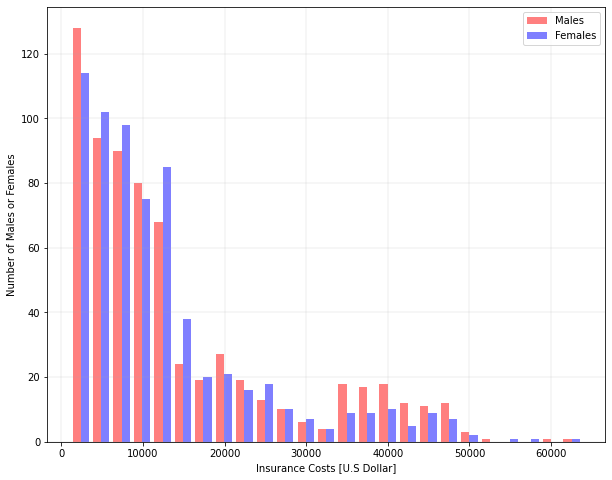

In [117]:
plt.figure(figsize=(10,8))
plt.hist([male_costs,female_costs], bins = 25, color=['r','b'], alpha=0.5, label = ["Males", "Females"])
plt.ylabel("Number of Males or Females")
plt.xlabel("Insurance Costs [U.S Dollar]")
plt.grid(linewidth=.2)
plt.legend()
plt.show()


The results above show a heavily skewed distribution for both males and females. This indicates that we should look at the median cost rather than the mean:

In [122]:
male_median_cost = np.median(male_costs)
female_median_cost = np.median(female_costs)

print("The median insurance cost for males is " + str(male_median_cost) + " dollars.")

print("The median insurance cost for females is " + str(female_median_cost) + " dollars.")
print("The difference in the median insurance costs form males and females is: " + str(int(male_median_cost - female_median_cost)) + " dollars.")


The median insurance cost for males is 9369.61575 dollars.
The median insurance cost for females is 9412.9625 dollars.
The difference in the median insurance costs form males and females is: -43 dollars.


We can see that by looking at the median costs, the females are paying $43 dollars more per year than males. 

Something that also peaked my interest was to see whether the males had the higher insurance costs accross all regions of the United States:

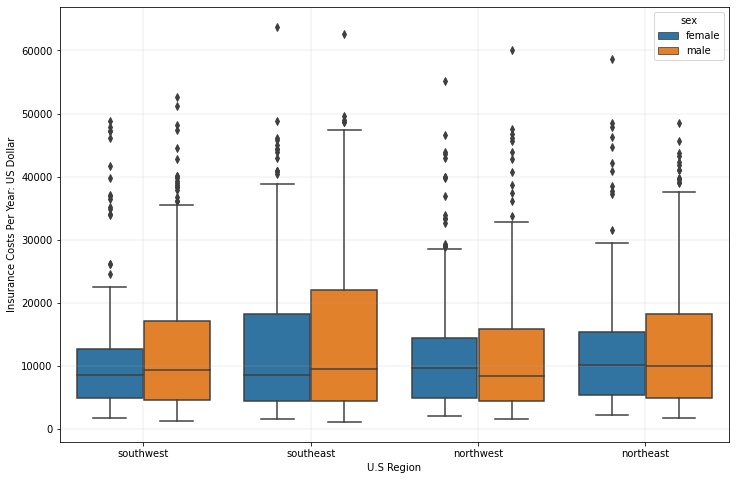

In [88]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(x = df["region"], y = df["charges"], hue = df["sex"])
plt.xlabel("U.S Region")
plt.ylabel("Insurance Costs Per Year: US Dollar")
plt.grid(linewidth=.2)